In [1]:
#Importing the Libraries

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [2]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/Colab Notebooks/cotton disease/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/cotton disease/test'

In [3]:
inception_resnet = InceptionResNetV2(include_top=False,weights='imagenet',input_shape=IMAGE_SIZE +[3])

219062272/219055592 [==============================] - 2s 0us/step


In [4]:
for layer in inception_resnet.layers:
  layer.trainable = False

In [5]:
#No of output classe 
folders = glob('/content/drive/MyDrive/Colab Notebooks/cotton disease/train/*')
folders

['/content/drive/MyDrive/Colab Notebooks/cotton disease/train/diseased cotton leaf',
 '/content/drive/MyDrive/Colab Notebooks/cotton disease/train/fresh cotton plant',
 '/content/drive/MyDrive/Colab Notebooks/cotton disease/train/fresh cotton leaf',
 '/content/drive/MyDrive/Colab Notebooks/cotton disease/train/diseased cotton plant']

In [7]:
flat_layer=Flatten()(inception_resnet.output)
dense_l1=Dense(len(folders),activation='softmax')(flat_layer)

In [8]:
model=Model(inputs=inception_resnet.inputs,outputs=dense_l1,name='Cotton_Disease_Prediction')
model.summary()

Model: "Cotton_Disease_Prediction"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
__________________________________________________________________________

In [9]:
#compiling the model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [10]:
#Rescaling the image - Data Augmentation

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,zoom_range=0.0,
                                   horizontal_flip=True, vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_dataset=train_datagen.flow_from_directory(train_path,
                                                target_size=IMAGE_SIZE,
                                                batch_size=32,
                                                class_mode='categorical')

test_dataset=test_datagen.flow_from_directory(test_path,
                                                target_size=IMAGE_SIZE,
                                                batch_size=32,
                                                class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [12]:
inception_resnet_model = model.fit_generator(train_dataset,
                                             validation_data=test_dataset,
                                             epochs=20,
                                             steps_per_epoch=len(train_dataset),
                                             validation_steps=len(test_dataset))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 1238s 20s/step - loss: 3.3806 - accuracy: 0.6078 - val_loss: 0.8422 - val_accuracy: 0.8679
Epoch 2/20
61/61 [==============================] - 37s 604ms/step - loss: 0.7687 - accuracy: 0.8535 - val_loss: 0.5853 - val_accuracy: 0.8868
Epoch 3/20
61/61 [==============================] - 37s 602ms/step - loss: 0.3571 - accuracy: 0.9255 - val_loss: 0.4207 - val_accuracy: 0.8679
Epoch 4/20
61/61 [==============================] - 37s 605ms/step - loss: 0.4063 - accuracy: 0.9212 - val_loss: 0.7129 - val_accuracy: 0.8491
Epoch 5/20
61/61 [==============================] - 37s 601ms/step - loss: 0.3063 - accuracy: 0.9341 - val_loss: 0.5837 - val_accuracy: 0.8868
Epoch 6/20
61/61 [==============================] - 37s 602ms/step - loss: 0.2930 - accuracy: 0.9350 - val_loss: 0.4386 - val_accuracy: 0.9151
Epoch 7/20
61/61 [==============================] - 37s 605ms/step - loss: 0.2674 - accuracy: 0.9519 - val_loss: 0.6566 - val_accuracy: 0.9245

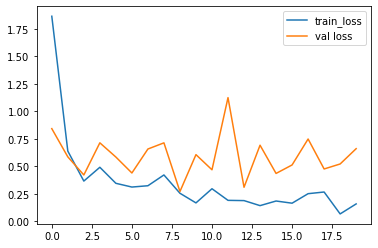

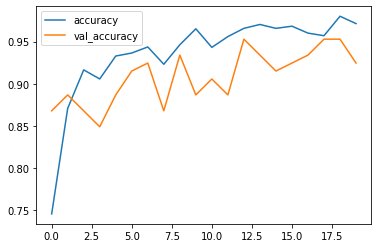

<Figure size 432x288 with 0 Axes>

In [13]:
#Plotting the loss and accuracy 
plt.plot(inception_resnet_model.history['loss'],label='train_loss')
plt.plot(inception_resnet_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(inception_resnet_model.history['accuracy'],label='accuracy')
plt.plot(inception_resnet_model.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('accuracyVal_accuracy')

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Colab Notebooks/cotton disease/inception_resNetV2_model.h5')

In [14]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/cotton disease/inception_resNetV2_model.h5')

img =load_img('/content/drive/MyDrive/Colab Notebooks/cotton disease/val/diseased cotton leaf/dis_leaf (100)_iaip.jpg',
              target_size=IMAGE_SIZE)
arr_img=image.img_to_array(img)
arr_img=np.expand_dims(arr_img,axis=0)
img_data=preprocess_input(arr_img)
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)
if a==0:
  print('Diseased Cotton leaf')
elif a==1:
    print('Diseased Cotton plant')
elif a==2:
    print('Fresh cotton leaf')
else:
    print('Fresh cotton plant')

Diseased Cotton leaf
